In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import folium.plugins
from sklearn.preprocessing import LabelEncoder
from DecisionTree import decision_tree_algorithm, decision_tree_make_predictions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
# Loading the data
data = pd.read_csv("data/globalterrorismdb_50_percent.csv")
data.head(3)

C:\Users\rahul\AppData\Local\Temp\ipykernel_32764\3435232744.py:2: DtypeWarning: Columns (63,94,96) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/globalterrorismdb_50_percent.csv")


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  2.010000e+11   2007       6    12        NaN         0        NaN      153   
1  1.990000e+11   1987       2    16        NaN         0        NaN       45   
2  1.990000e+11   1992       5     6        NaN         0        NaN       92   

  country_txt  region  ... addnotes  \
0    Pakistan       6  ...      NaN   
1    Colombia       3  ...      NaN   
2       India       6  ...      NaN   

                                              scite1  \
0  �Student leader gunned down in Karachi,� Pakis...   
1                                                NaN   
2                                                NaN   

                                              scite2  \
0  �Selection list: Pakistan press Nawa-e Waqt 14...   
1                                                NaN   
2                                                NaN   

                                              scite3  dbsource  INT_LOG  \
0  �Selection list: Pakistan press Ummat 14 Jun 0...     CETIS       -9   
1                                                NaN      PGIS        0   
2                                                NaN      PGIS       -9   

   INT_IDEO INT_MISC INT_ANY  related  
0        -9        0      -9      NaN  
1         0        0       0      NaN  
2        -9        1       1      NaN  

[3 rows x 135 columns]

In [3]:
# selecting the columns.
data.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day'}, inplace = True)
data = data[['Year', 'Month', 'Day', 'latitude', 'longitude', 'country', 'region', 'nkill', 'nwound', 'targtype1',
                            'attacktype1', 'weaptype1', 'country_txt', 'region_txt', 'success' , 'gname']]


In [4]:
# Removing the missing values
data.dropna(axis=0, inplace=True)
data.isnull().sum()

Year           0
Month          0
Day            0
latitude       0
longitude      0
country        0
region         0
nkill          0
nwound         0
targtype1      0
attacktype1    0
weaptype1      0
country_txt    0
region_txt     0
success        0
gname          0
dtype: int64

In [5]:
data.head(5)

Year  Month  Day   latitude  longitude  country  region  nkill  nwound  \
0  2007      6   12  24.891115  67.143311      153       6    1.0     0.0   
1  1987      2   16   4.667128 -74.106056       45       3    0.0     0.0   
2  1992      5    6  28.690073  77.213982       92       6    0.0     0.0   
3  2002      1    3  43.320229  45.654491      167       9    0.0     0.0   
4  1982     12   31  42.309409   9.149022       69       8    0.0     1.0   

   targtype1  attacktype1  weaptype1 country_txt      region_txt  success  \
0         14            2          5    Pakistan      South Asia        1   
1          3            6          5    Colombia   South America        1   
2          7            1          5       India      South Asia        1   
3          4            3          6      Russia  Eastern Europe        1   
4         14            1         13      France  Western Europe        0   

                                           gname  
0                                        Unknown  
1  Revolutionary Armed Forces of Colombia (FARC)  
2                                        Unknown  
3                                 Chechen Rebels  
4      Corsican National Liberation Front (FLNC)

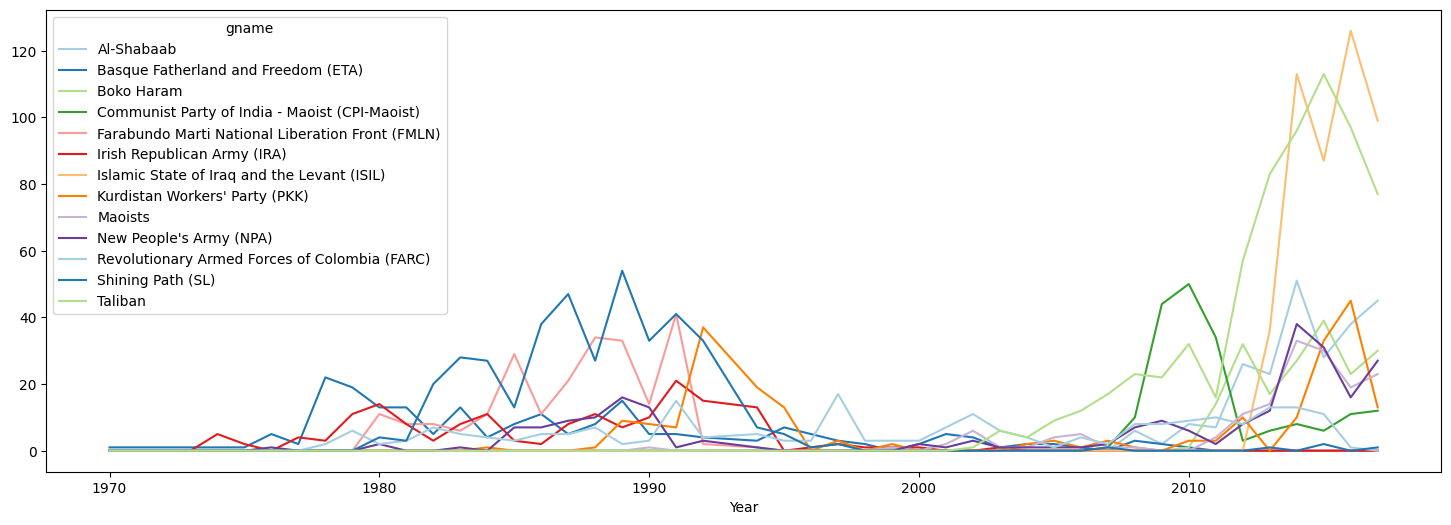

In [6]:
# Visualizing the data in different form
top_groups10=data[data['gname'].isin(data['gname'].value_counts()[1:14].index)]
pd.crosstab(top_groups10.Year,top_groups10.gname).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

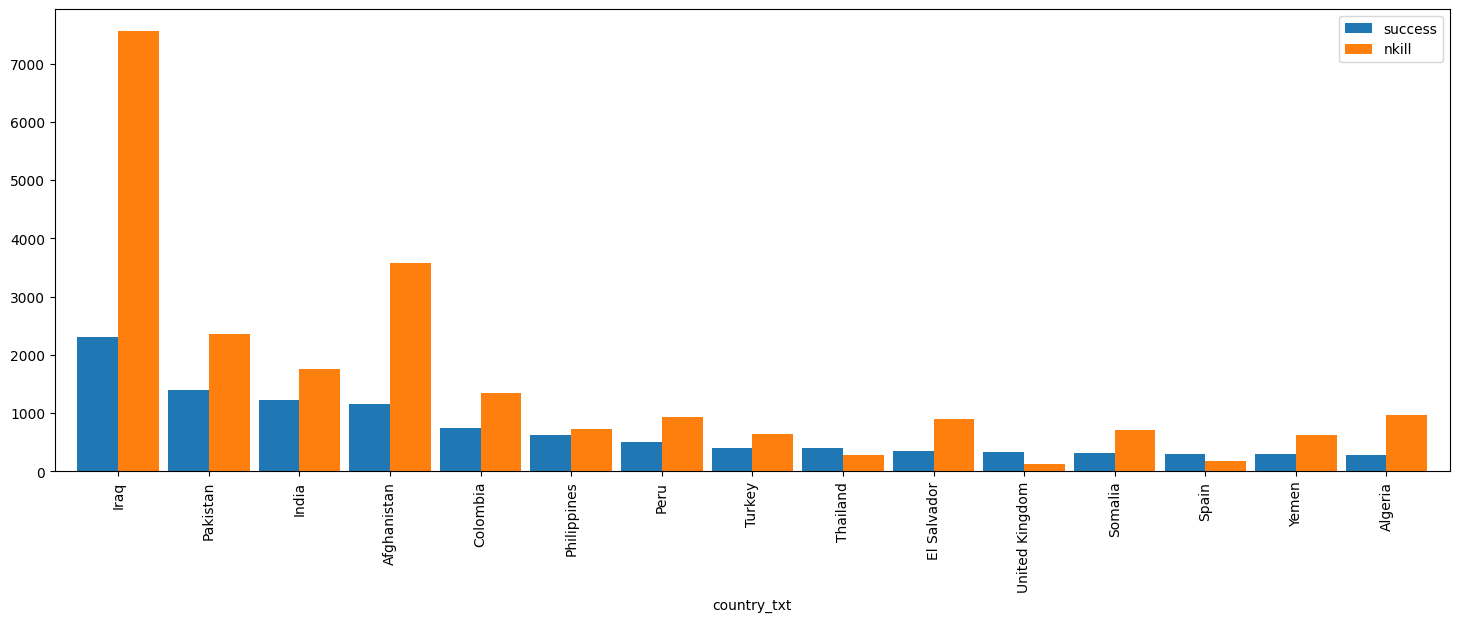

In [7]:
# analyzing number of kills and success in attacks
terror=data['country_txt'].value_counts()[:15].to_frame()
terror.columns=['success']
coun_kill=data.groupby('country_txt')['nkill'].sum().to_frame()
terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [ ]:
# Analyzing via plotting on map

world_map=data.copy()
world_map.dropna(subset=['latitude','longitude'],inplace=True)
location_map=world_map[['latitude','longitude']][:66039]
gang_map=world_map['gname'][:66039]
country_map=world_map['country_txt'][:66039]
success_map=world_map['success'][:66039]
def color_point(x):
    if x>=20:
        color='red'
    elif ((x>0 and x<20)):
        color='blue'
    else:
        color='green'
    return color
def point_size(x):
    if (x>20 and x<100):
        size=2
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size
map2 = folium.Map(location=[30,0],tiles='CartoDB dark_matter',zoom_start=2)
for point in location_map.index:
    info='<b>gname </b>:'+str(gang_map[point])+'<br><b>country_txt </b>: '+str(country_map[point])+'<br><b>attempts </b>: '+str(success_map[point])
    iframe = folium.IFrame(html=info, width=200, height=200)
    folium.CircleMarker(list(location_map.loc[point].values),popup=folium.Popup(iframe),radius=point_size(success_map[point]),color=color_point(success_map[point])).add_to(map2)
map2

Dropping some unwanted columns

In [9]:
# Handle missing values
data['nkill'].fillna(0, inplace=True)
data['nwound'].fillna(0, inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_16216\854883999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['nkill'].fillna(0, inplace=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_16216\854883999.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [10]:
# Feature Engineering
data['Casualties'] = data['nkill'] + data['nwound']
data.drop(['nkill', 'nwound'], axis=1, inplace=True)

In [11]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['country_txt', 'region_txt', 'gname']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and labels
X = data.drop(['success'], axis=1)
y = data['success']

In [12]:
# Handle imbalanced data with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
# Implementing Random Forest from Scratch
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for _ in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    return forest

def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_make_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions
    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    return random_forest_predictions

In [15]:
#Random Forest Classifier from sklearn

rfc = RandomForestClassifier()

In [16]:
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [21]:
# Train Custom Random Forest Model
n_trees = 15
n_bootstrap = int(0.8 * len(X_train))
n_features = int(np.sqrt(len(X_train.columns)))
dt_max_depth = 10
forest = random_forest_algorithm(X_train.join(y_train), n_trees, n_bootstrap, n_features, dt_max_depth)
# Make Predictions using Custom Random Forest
rf_predictions = random_forest_predictions(X_test, forest)

In [22]:
# Evaluate Accuracy and F1 Score of Random Forest Classifier from scratch and scipy
comparison_df = pd.DataFrame({
    "Model": ["Scikit-learn Random Forest", "Custom Random Forest"],
    "Accuracy": [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, rf_predictions)],
    "F1 Score": [f1_score(y_test, rfc_pred, average='weighted'), f1_score(y_test, rf_predictions, average='weighted')]
})
print(comparison_df)

                        Model  Accuracy  F1 Score
0  Scikit-learn Random Forest  0.942782  0.942782
1        Custom Random Forest  0.853521  0.853445


In [28]:
# Creating Interactive Map with Color Coding Based on Terrorist Group
import matplotlib.colors as mcolors
map_data = X_test.copy()
map_data["Prediction"] = rf_predictions
map_data['gname_decoded'] = label_encoders['gname'].inverse_transform(map_data['gname'].astype(int))
unique_groups = map_data['gname_decoded'].unique()
color_list = list(mcolors.TABLEAU_COLORS.values())
group_color_map = {group: color_list[i % len(color_list)] for i, group in enumerate(unique_groups)}

def color_point(group_name):
    return group_color_map.get(group_name, 'gray')

terror_map = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB dark_matter')
for _, row in map_data.dropna(subset=['latitude', 'longitude']).iterrows():
    prediction_value = int(row['Prediction'])
    terrorist_group = row.get('gname_decoded', 'Unknown')
    group_color = color_point(terrorist_group)
    popup_info = f"""
    <b>Country:</b> {row.get('country_txt', 'Unknown')}<br>
    <b>Terrorist Group:</b> {terrorist_group}<br>
    <b>Prediction:</b> {'Successful Attack' if prediction_value == 1 else 'Unsuccessful Attack'}
    """
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        popup=folium.Popup(popup_info, max_width=300),
        color=group_color,
        fill=True,
        fill_color=group_color,
        fill_opacity=0.6
    ).add_to(terror_map)

terror_map


In [26]:
# Save the Folium map as an HTML file
map_filename = "terror_map_visual.html"
map2.save(map_filename)

print(f"Map saved as {map_filename}")


Map saved as terror_map_visual.html
